<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0620_30%EC%9D%BC%EC%B0%A8_AI(%EB%94%A5%EB%9F%AC%EB%8B%9D)%5BRelu%2CSigmoid%2CAffine%2CSoftmaxLoss%2C%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95(SGD)%5BMomentum%2CAdagrad%2CRmsprop%2CAdam%5D%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cat mnist_keras_client.py

#!/usr/bin/env python
# -*- coding: utf-8 -*-

import mnist_keras_module as MKM
import history_plot as hp
from mnist import load_mnist

#(train_images, train_labels),(test_images, test_labels) = MKM.get_data()
(train_images, train_labels),(test_images, test_labels) = load_mnist(normalize = True, one_hot_label = True)
model = MKM.build_model()

history = model.fit(train_images, train_labels, epochs = 5, batch_size = 128)
#fit 가중치
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc, test_loss)

hp.history_plot(history)



In [ ]:
cat mnist_keras_module.py

#!/usr/bin/env python
# -*- coding: utf-8 -*-
from keras.datasets import mnist
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
from mnist import load_mnist

def get_data():
    (train_images, train_labels), (test_images, test_labels) = load_mnist.load_data()
    
    train_images = train_images.reshape((60000, 784))
    train_images = train_images.astype('float32')/255
    
    test_images = test_images.reshape((10000, 784))
    test_images = test_images.astype('float32')/255
    #print(test_labels[:10])
    
    train_labels = to_categorical(train_labels) #train_labels= [2,3,4...] -> [0,0,1,0,0,...]범주형 데이터로 고쳐준다.
    test_labels = to_categorical(test_labels)
    return (train_images, train_labels), (test_images, test_labels)
'''
def get_data():
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    
    train_images = train_images.reshape((60000, 784))
    train_images = train_images.astype('float32')/25

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2610 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0489 - accuracy: 0.9858
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9802
0.9801999926567078 0.0675184428691864
dict_keys(['loss', 'accuracy'])


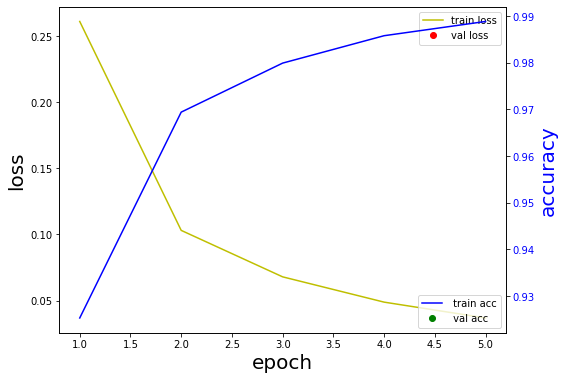

In [ ]:
%run mnist_keras_client.py

y = ax+b
dy/dx = a
y = ax + b+ ct

x,t

$$
\frac{∂y}{∂x} = a

\\
{∂}{∂}

$$

$$
z = x+y

\frac {∂z} {∂x} = 1, 

\frac {∂z} {∂y} = 1
$$

오차역전파 덧셈은

{∂L}{∂z} + {∂L}{∂z} X 1 (x)
{∂L}{∂z} + {∂L}{∂z} X 1 (y)

y = ax 편미분{∂y}{∂x} = a
$$
E {{∂y}\over{∂x}}
= Ea
$$

$$
E{{∂y}\over{∂x}}
= Ex
$$

z = xy 의 미분

$$
z = xy
$$
$$

$$

$$
{\partial z \over \partial z} = 1
$$
$$
{\partial 715 \over \partial 715} = 1
$$

5.5 활성화 함수 계층 구현하기

ReLu와 

5.5.1 계층

y = x(x>0)

y = 0(x<=0)

위식을 x에 대하면

In [ ]:
class Relu:
    def __init__(self):
        self.mask = None
    def forwar(self, x):
        self.mask = (x <=0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [ ]:
import numpy as np

x= np.array([[1.0, 0.5], [-2.0, 3.0]])
print(x)

[[ 1.   0.5]
 [-2.   3. ]]


In [ ]:
mask = (x <=0)
print(mask)

[[False False]
 [ True False]]


In [ ]:
out = x.copy()
out[mask] = 0
out

array([[1. , 0.5],
       [0. , 3. ]])

시그모이드 함수



1단계 '/' 노드, y = 1/x를 미분하면 다음 식이됨

In [ ]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1/ (1+np.exp(-x))
        self.out = out

        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

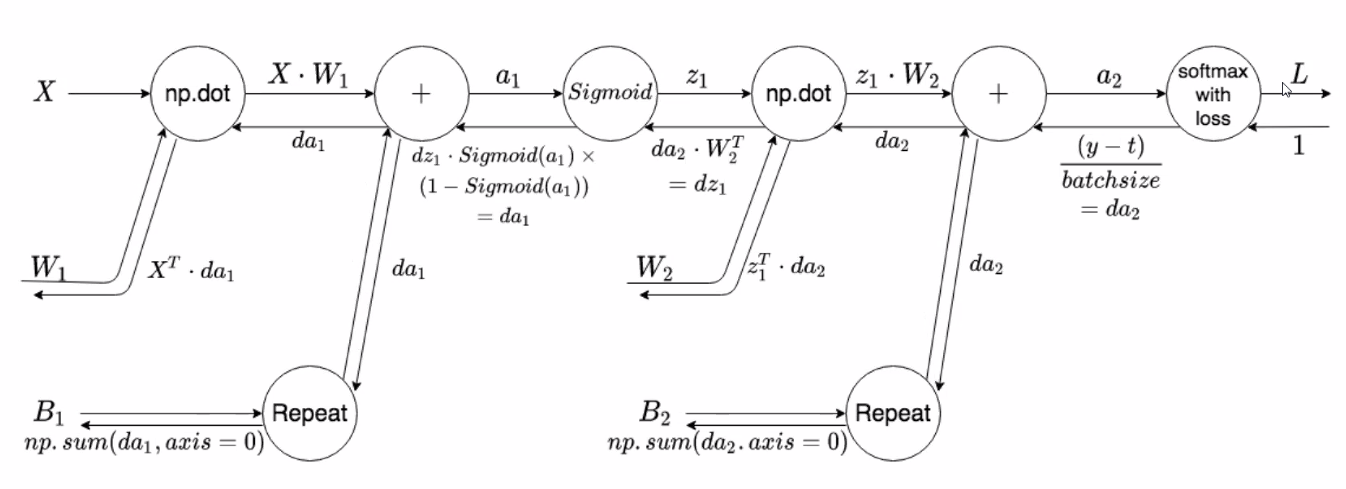

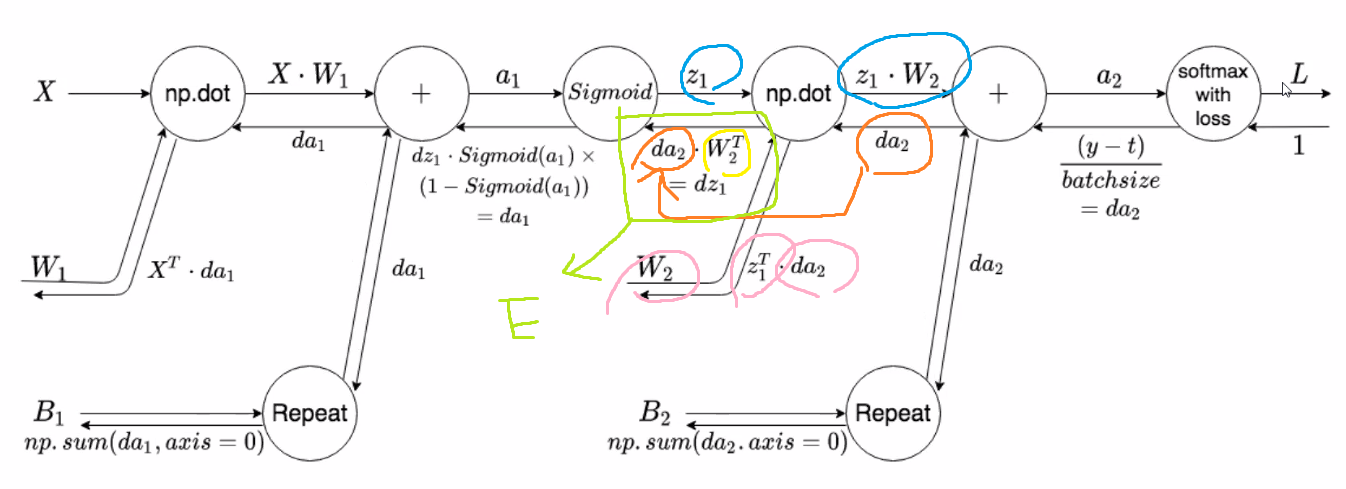

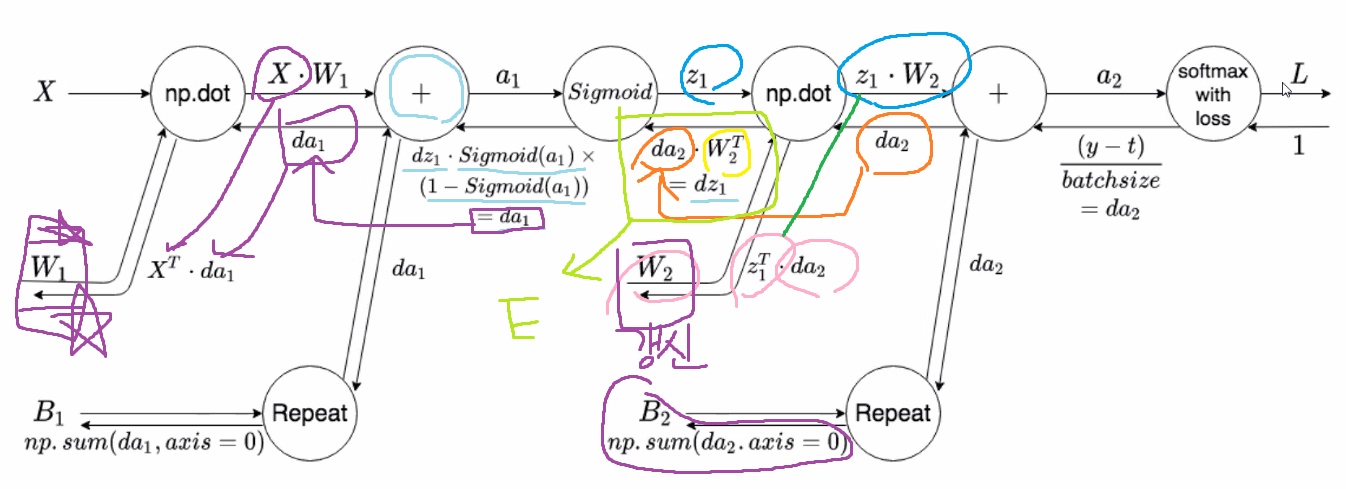

In [ ]:
X = np.random.rand(2)   #입력
W = np.random.rand(2,3) #가중치
B = np.random.rand(3)   #편향

In [ ]:
print(X.shape)
print(W.shape)
print(B.shape)

(2,)
(2, 3)
(3,)


In [ ]:
Y = np.dot(X,W)+B

In [ ]:
Y

array([0.43003322, 0.71620246, 0.23918118])

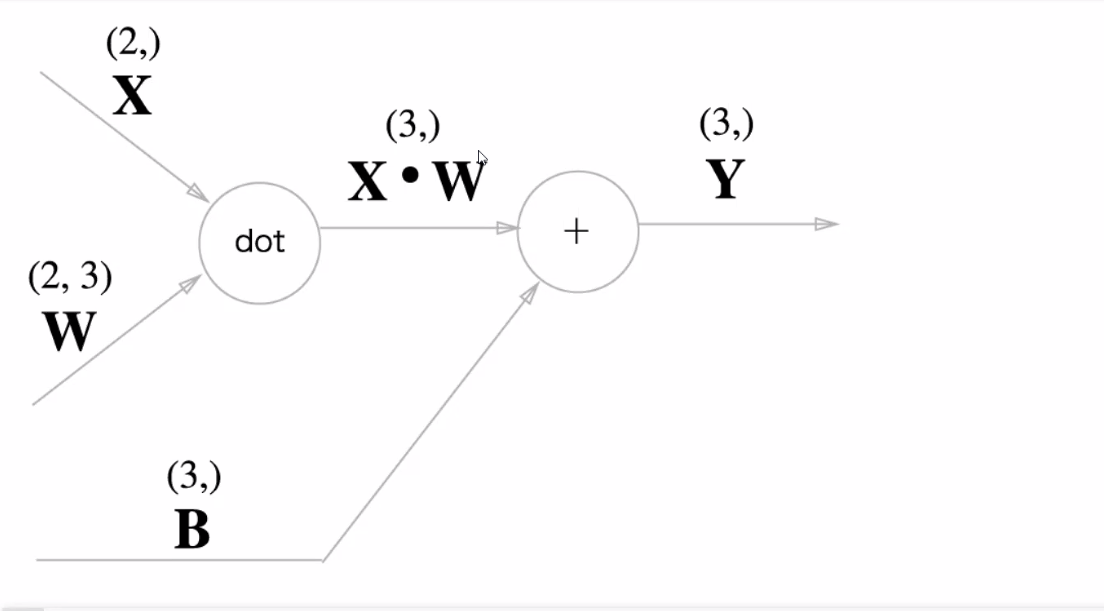

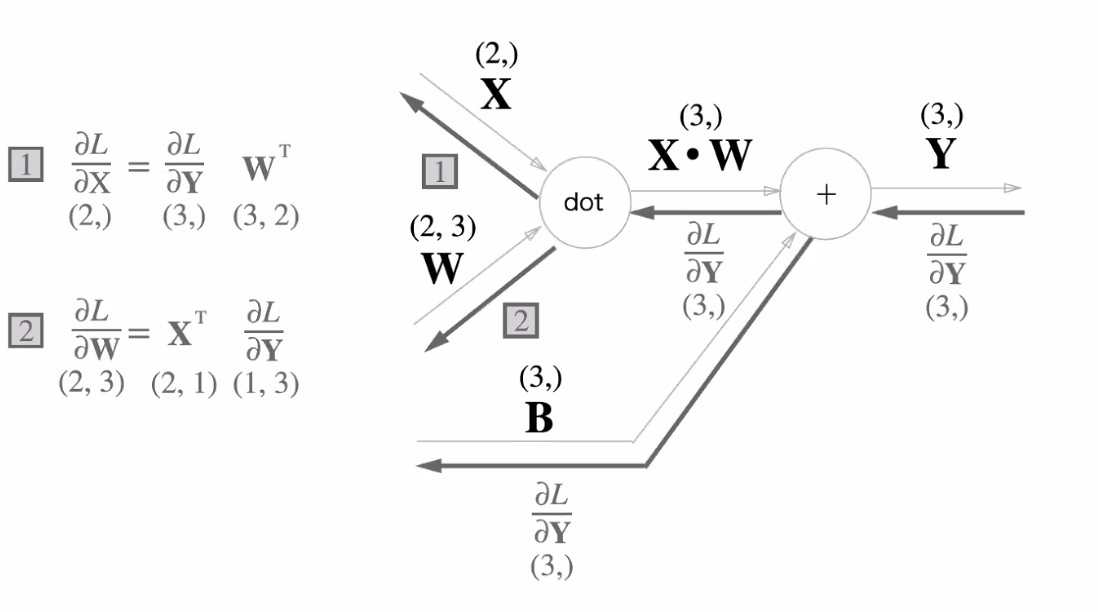

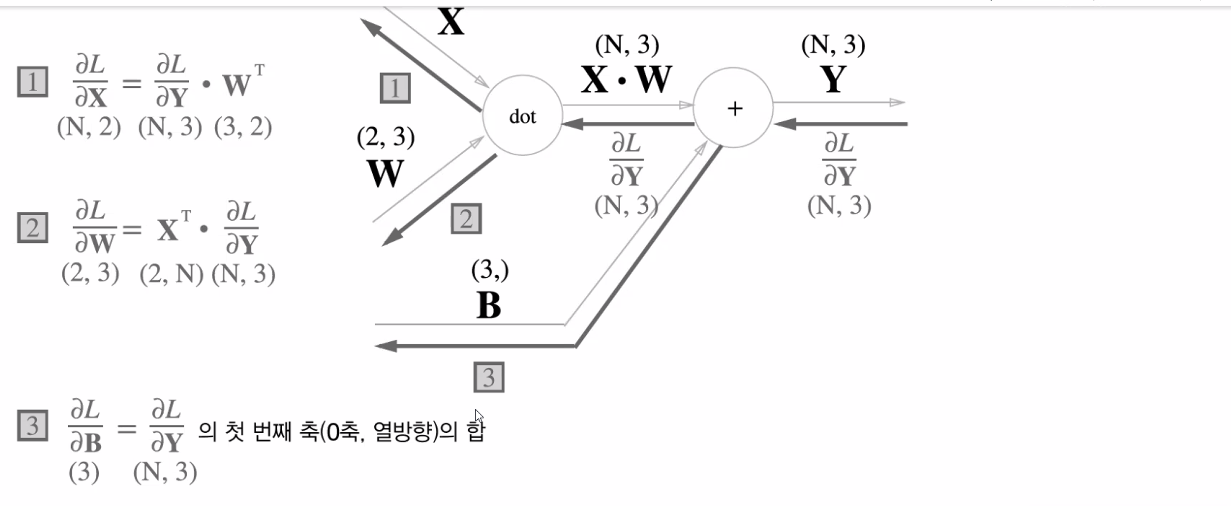

In [ ]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    
    def forward(self,x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        return dx

In [ ]:
class SoftmaxLoss:
    def __init__(self):
        self.loss  = None #손실
        self.y = None       #softmax의 출력
        self.t = None       #정답 레이블

    def forward(self,x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t)/ batch_size  #위 그림 에서 y-t

        return dx

신경망 전체 그림

학습 : 가중치와 편향을 훈련데이터에 적응하도록 조정하는 과정

1단계 : 미니배치

미니배치 : 훈련데이터중 일부를 무작위로 가져옴 -> stopcasting

목표 : 미니배치의 손실 함수 값을 줄이기

2단계 : 기울기 산출

가중치 매개변수의 기울기를 구함. 기울기는 손실함수의 값을 가장 작게하는 방향을 제시

3단계 : 매개변수 갱신

가중치 매개변수를 기울기 방향으로 아주 조금 갱신

4단계 : 반복

1~3단계 반복

오차역전파법이 등장하는 단계는 두번째인 '기울기산출'

느린 수치 미분과 달리 기울기를 효율적이고 빠르게 구할 수 있음


In [ ]:
from mnist import load_mnist
from networks import TwoLayerNet

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [ ]:
x_batch = x_train[:3]
t_batch = t_train[:3]

In [ ]:
network  = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [ ]:
grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch,t_batch)

In [ ]:
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key]-grad_numerical[key]))
    print(key + ':' + str(diff))

W1:4.731779247909875e-13
b1:1.4707359711606942e-12
W2:1.5010210741017716e-11
b2:1.1945998912299416e-10


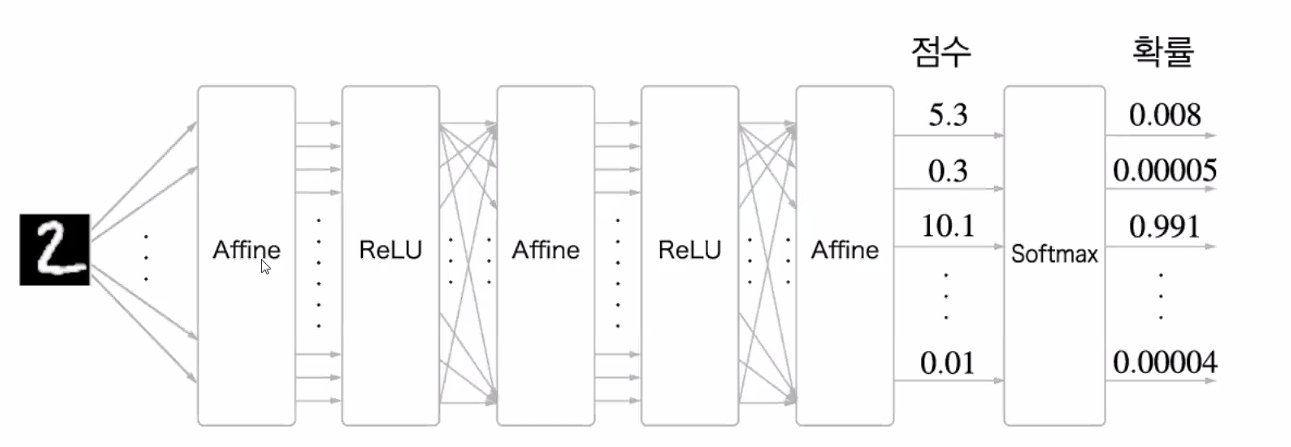

경사 하강법

확률적 경사 하강법(SGD)

확률적으로 무작위로 골라낸 데이터에 대해 수행하는 경사 하강법. 미니배치를 사용해 무작위로 선정한 데이터에 대해 겅가 하강법을 쓰기 때문임

- 모멘텀 : 국소 최소점을 벗어날 수 있도록 SGD식에 가중치의 1차식을 더해준 방식

- Adagrad : 고정된 학습률이 아닌 변화하느 학습률을 사용하게 해주는 옵티마이저

- rmsprop :Adagrad에서 학습률이 줄어드는 문제를 해결하기 위한 옵티마이저

- Adam : 모멘텀 + RMSPROP

<수원대 환경과학부 한경훈 교수>

6.1.2 확률적 경사 하강법(SGD)

최적화 : 손실함수의 값을 가능한 낮추는 매개변수를 찾음. 최적 매개변수를 찾는 문제를 푸는것.


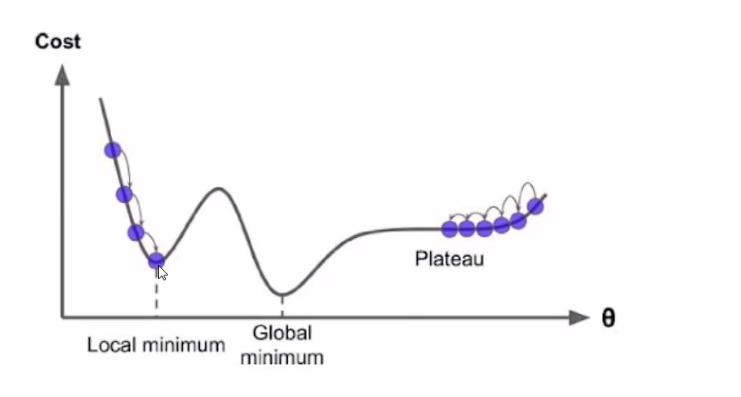